In [122]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [123]:
RESULTS_PATH = os.path.join("benchmark", "results", "results.csv")

In [209]:
df = pd.read_csv(RESULTS_PATH)
df['version'].values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       16, 17, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31])

In [154]:
# TEST min_sim_db
versions = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
df_min_sim_db = df[df['version'].isin(versions)]
df_min_sim_db.sort_values('min_sim_db', inplace=True)

C:\Users\rdiaz\AppData\Local\Temp\ipykernel_12100\1836878802.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min_sim_db.sort_values('min_sim_db', inplace=True)


In [155]:
columns = [
    'min_sim_db', 'keep_full_img', 
    'map_easy', 'map_medium', 'map_hard', 
    'mp@1_easy', 'mp@1_medium', 'mp@1_hard', 
    'mp@5_easy', 'mp@5_medium', 'mp@5_hard', 
    'mp@10_easy', 'mp@10_medium', 'mp@10_hard',
    'map_easy_bbox', 'map_medium_bbox', 'map_hard_bbox', 
    'mp@1_easy_bbox', 'mp@1_medium_bbox', 'mp@1_hard_bbox', 
    'mp@5_easy_bbox', 'mp@5_medium_bbox', 'mp@5_hard_bbox', 
    'mp@10_easy_bbox', 'mp@10_medium_bbox', 'mp@10_hard_bbox'
]
df_min_sim_db = df_min_sim_db[columns]

In [156]:
# Paso 1: separar por valor de keep_full_img
df_0 = df_min_sim_db[df_min_sim_db['keep_full_img'] == 0].copy()
df_1 = df_min_sim_db[df_min_sim_db['keep_full_img'] == 1].copy()

# Paso 2: renombrar columnas métricas en df_1
metric_cols = [col for col in df.columns if col not in ['min_sim_db', 'keep_full_img']]
df_1 = df_1.rename(columns={col: f"{col}_keep_full" for col in metric_cols})

# Paso 3: hacer merge por min_sim_db
df_min_sim_db_merged = pd.merge(df_0, df_1, on='min_sim_db', how='outer')

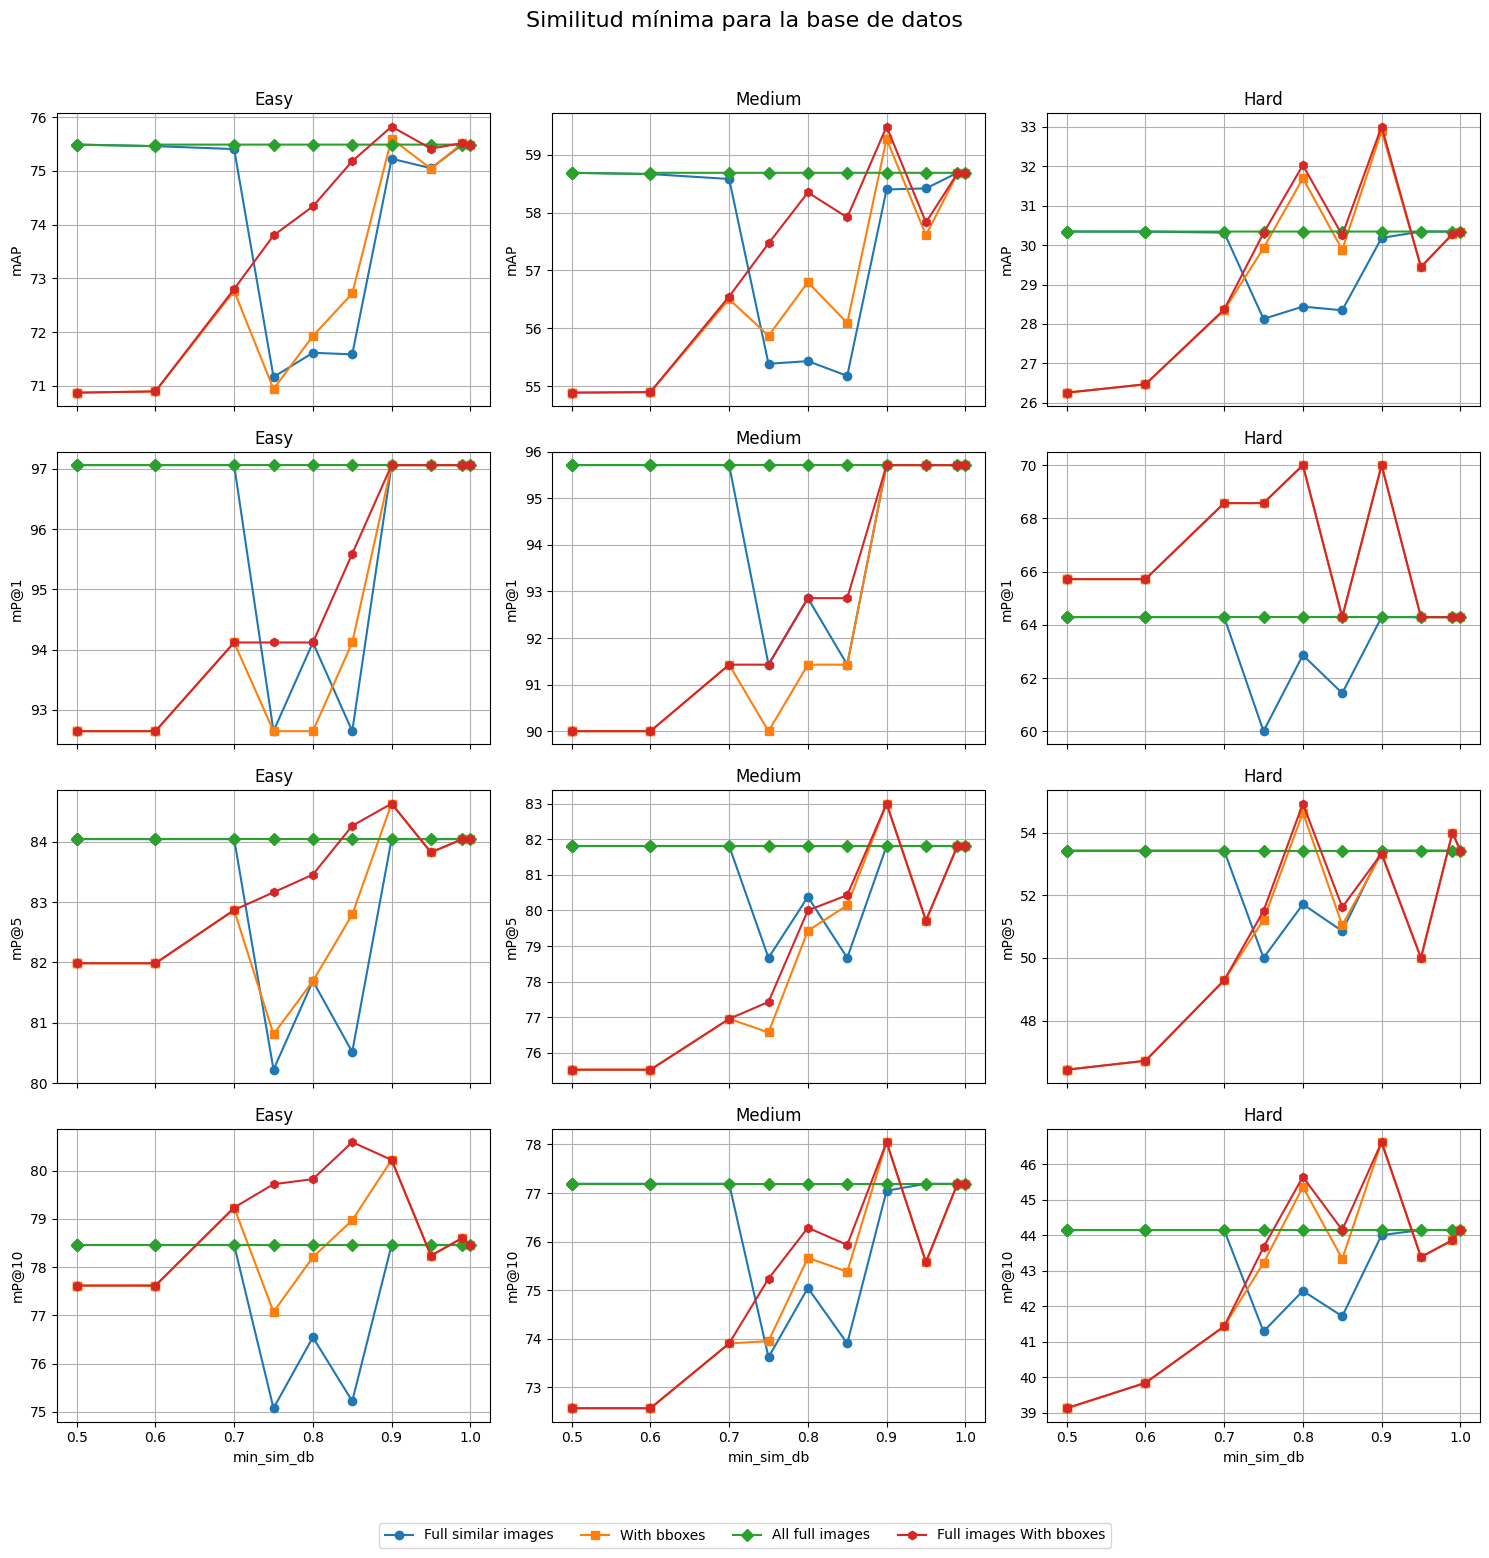

In [157]:
# Definir configuración de las métricas por nivel de dificultad
metrics = [
    ('map_easy', 'map_easy_bbox', 'map_easy_keep_full', 'map_easy_bbox_keep_full', 'Easy'),
    ('map_medium', 'map_medium_bbox', 'map_medium_keep_full', 'map_medium_bbox_keep_full', 'Medium'),
    ('map_hard', 'map_hard_bbox', 'map_hard_keep_full', 'map_hard_bbox_keep_full', 'Hard'),
    ('mp@1_easy', 'mp@1_easy_bbox', 'mp@1_easy_keep_full', 'mp@1_easy_bbox_keep_full', 'Easy'),
    ('mp@1_medium', 'mp@1_medium_bbox', 'mp@1_medium_keep_full', 'mp@1_medium_bbox_keep_full', 'Medium'),
    ('mp@1_hard', 'mp@1_hard_bbox', 'mp@1_hard_keep_full', 'mp@1_hard_bbox_keep_full', 'Hard'),
    ('mp@5_easy', 'mp@5_easy_bbox', 'mp@5_easy_keep_full', 'mp@5_easy_bbox_keep_full', 'Easy'),
    ('mp@5_medium', 'mp@5_medium_bbox', 'mp@5_medium_keep_full', 'mp@5_medium_bbox_keep_full', 'Medium'),
    ('mp@5_hard', 'mp@5_hard_bbox', 'mp@5_hard_keep_full', 'mp@5_hard_bbox_keep_full', 'Hard'),
    ('mp@10_easy', 'mp@10_easy_bbox', 'mp@10_easy_keep_full', 'mp@10_easy_bbox_keep_full', 'Easy'),
    ('mp@10_medium', 'mp@10_medium_bbox', 'mp@10_medium_keep_full', 'mp@10_medium_bbox_keep_full', 'Medium'),
    ('mp@10_hard', 'mp@10_hard_bbox', 'mp@10_hard_keep_full', 'mp@10_hard_bbox_keep_full', 'Hard')
]

# Crear subplots
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 15), sharex=True, sharey=False)

for i, (ax, (col1, col2, col3, col4, title)) in enumerate(zip(axs.flat, metrics)):
    df_min_sim_db_merged.plot(x='min_sim_db', y=col1, ax=ax, label='Full similar images', marker='o', legend=False)
    df_min_sim_db_merged.plot(x='min_sim_db', y=col2, ax=ax, label='With bboxes', marker='s', legend=False)
    df_min_sim_db_merged.plot(x='min_sim_db', y=col3, ax=ax, label='All full images', marker='D', legend=False)
    df_min_sim_db_merged.plot(x='min_sim_db', y=col4, ax=ax, label='Full images With bboxes', marker='h', legend=False)
    ax.set_title(title)
    ax.set_xlabel('min_sim_db')
    if i < 3:
        ax.set_ylabel('mAP')
    elif i < 6:
        ax.set_ylabel('mP@1')
    elif i < 9:
        ax.set_ylabel('mP@5')
    else:
        ax.set_ylabel('mP@10')
    ax.grid(True)

# Obtener handles y labels de cualquier eje (todos tienen los mismos)
handles, labels = axs[0, 0].get_legend_handles_labels()

# Colocar la leyenda una vez fuera del grid
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.02))

plt.suptitle('Similitud mínima para la base de datos', fontsize=16, y=1.01)
plt.tight_layout(rect=[0, 0.03, 1, 0.99])
plt.show()

In [210]:
# TEST min_area
versions = [22, 26, 27, 28, 29, 30, 31]
df_min_area = df[df['version'].isin(versions)]
df_min_area.sort_values('min_area', inplace=True)

C:\Users\rdiaz\AppData\Local\Temp\ipykernel_12100\1262841688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min_area.sort_values('min_area', inplace=True)


In [211]:
columns = [
    'min_area', 
    'map_easy_bbox', 'map_medium_bbox', 'map_hard_bbox', 
    'mp@1_easy_bbox', 'mp@1_medium_bbox', 'mp@1_hard_bbox', 
    'mp@5_easy_bbox', 'mp@5_medium_bbox', 'mp@5_hard_bbox', 
    'mp@10_easy_bbox', 'mp@10_medium_bbox', 'mp@10_hard_bbox'
]
df_min_area = df_min_area[columns]

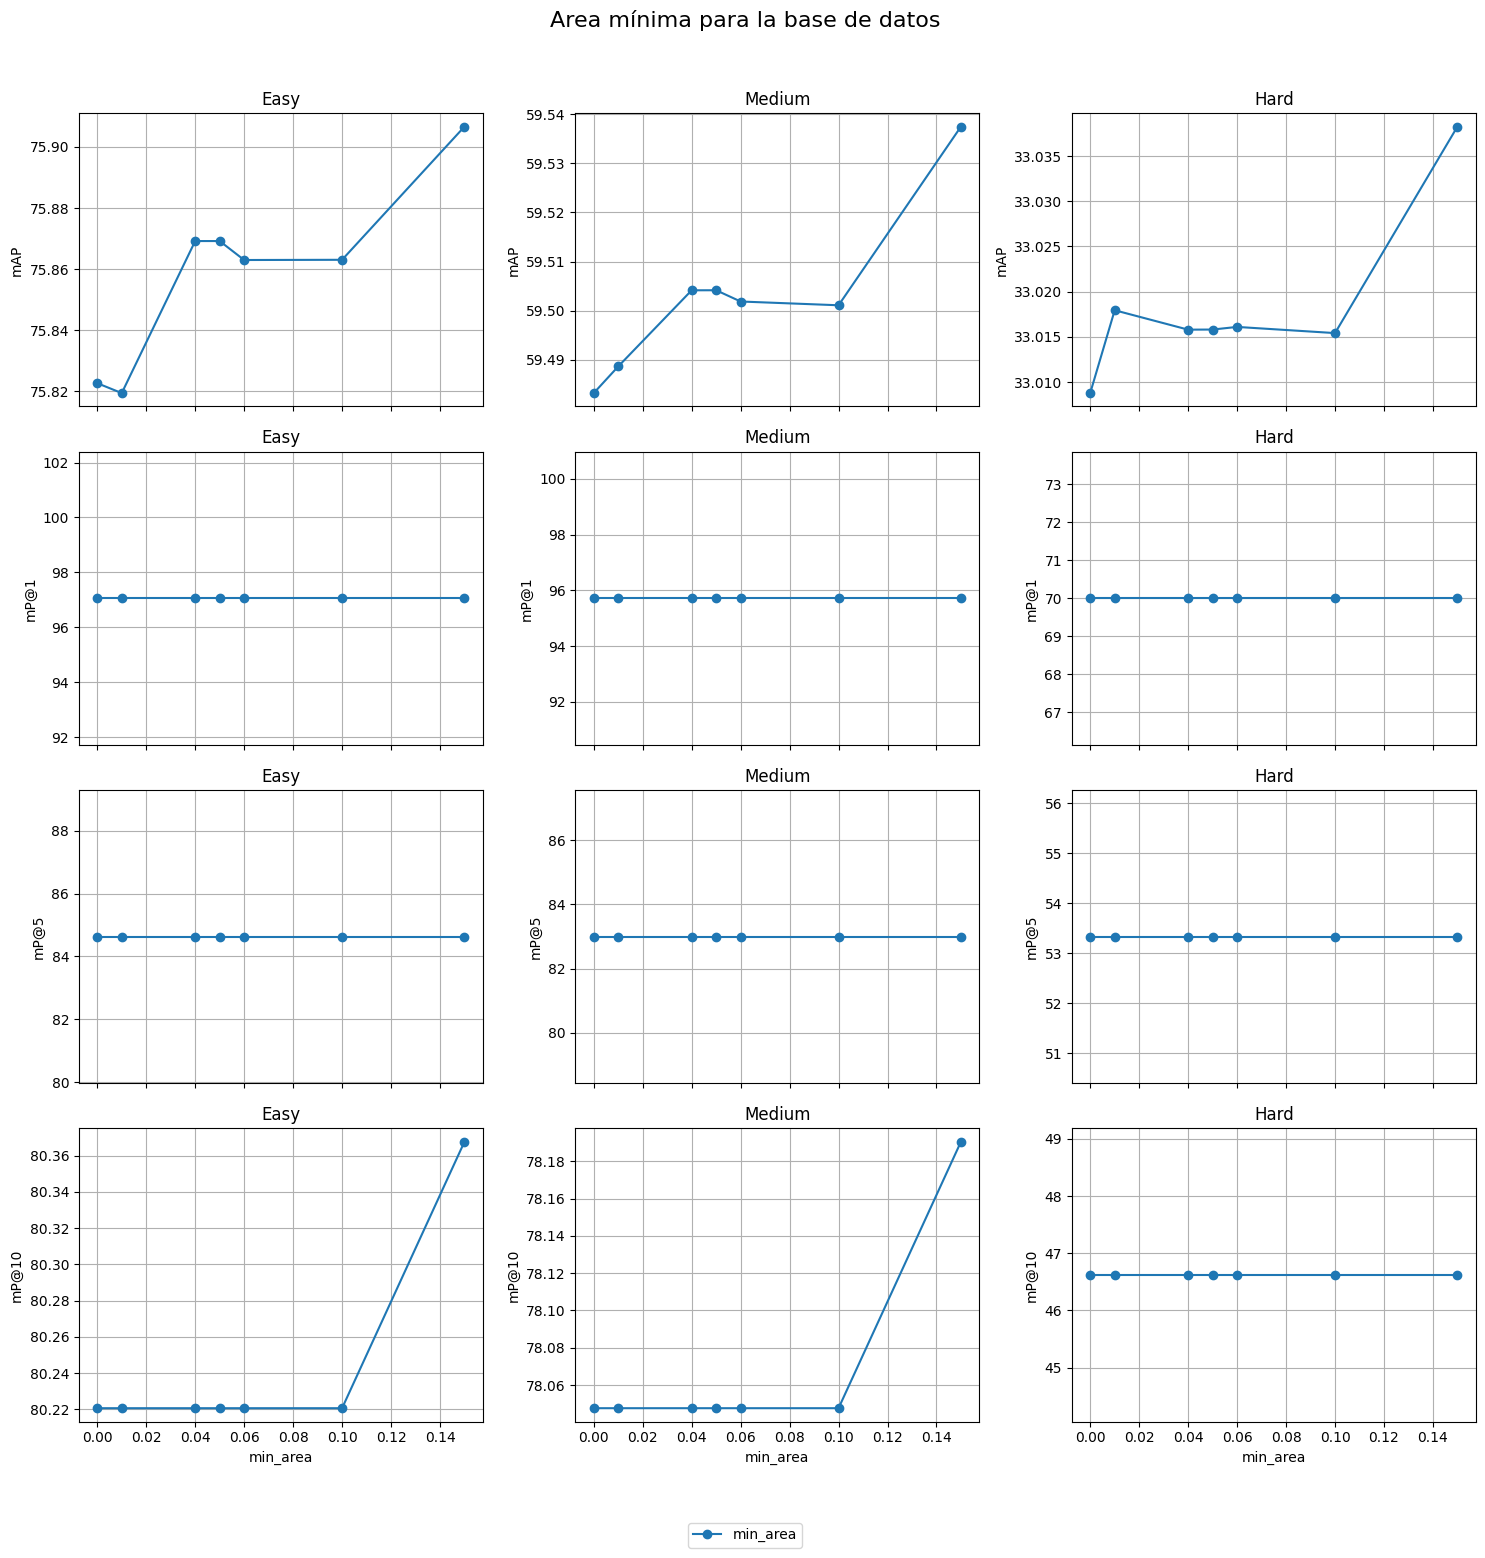

In [212]:
# Definir configuración de las métricas por nivel de dificultad
metrics = [
    ('map_easy_bbox', 'Easy'),
    ('map_medium_bbox', 'Medium'),
    ('map_hard_bbox', 'Hard'),
    ('mp@1_easy_bbox', 'Easy'),
    ('mp@1_medium_bbox', 'Medium'),
    ('mp@1_hard_bbox', 'Hard'),
    ('mp@5_easy_bbox', 'Easy'),
    ('mp@5_medium_bbox', 'Medium'),
    ('mp@5_hard_bbox', 'Hard'),
    ('mp@10_easy_bbox', 'Easy'),
    ('mp@10_medium_bbox', 'Medium'),
    ('mp@10_hard_bbox', 'Hard')
]

# Crear subplots
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 15), sharex=True, sharey=False)

for i, (ax, (col1, title)) in enumerate(zip(axs.flat, metrics)):
    df_min_area.plot(x='min_area', y=col1, ax=ax, label='min_area', marker='o', legend=False)
    ax.set_title(title)
    ax.set_xlabel('min_area')
    if i < 3:
        ax.set_ylabel('mAP')
    elif i < 6:
        ax.set_ylabel('mP@1')
    elif i < 9:
        ax.set_ylabel('mP@5')
    else:
        ax.set_ylabel('mP@10')
    ax.grid(True)

# Obtener handles y labels de cualquier eje (todos tienen los mismos)
handles, labels = axs[0, 0].get_legend_handles_labels()

# Colocar la leyenda una vez fuera del grid
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.02))

plt.suptitle('Area mínima para la base de datos', fontsize=16, y=1.01)
plt.tight_layout(rect=[0, 0.03, 1, 0.99])
plt.show()